In [48]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import dask.dataframe as dd  

In [52]:

# Step 2: Load Dataset with Dask 
df = dd.read_csv('US_Accidents_March23.csv')  # Replace with your actual filename

In [54]:
# Step 3: Convert to pandas (small sample if needed)
df = df.compute()

In [55]:
# Step 4: Initial Exploration
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (7728394, 46)
Columns: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [56]:
#  Step 5: Data Cleaning
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df = df.dropna(subset=['Start_Time', 'End_Time', 'Severity', 'Weather_Condition', 'City'])


In [57]:
#  Step 6: Feature Engineering
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\1660829097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


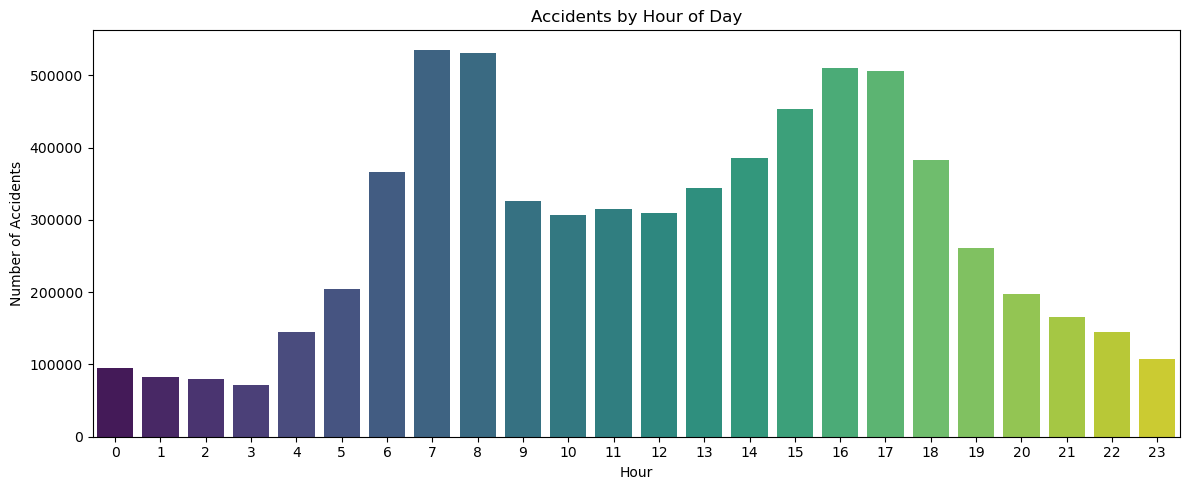

In [58]:
#  Step 7: Visualizations

## 1. Accidents by Hour
plt.figure(figsize=(12, 5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\1124112052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.index, y=top_weather.values, palette='coolwarm')


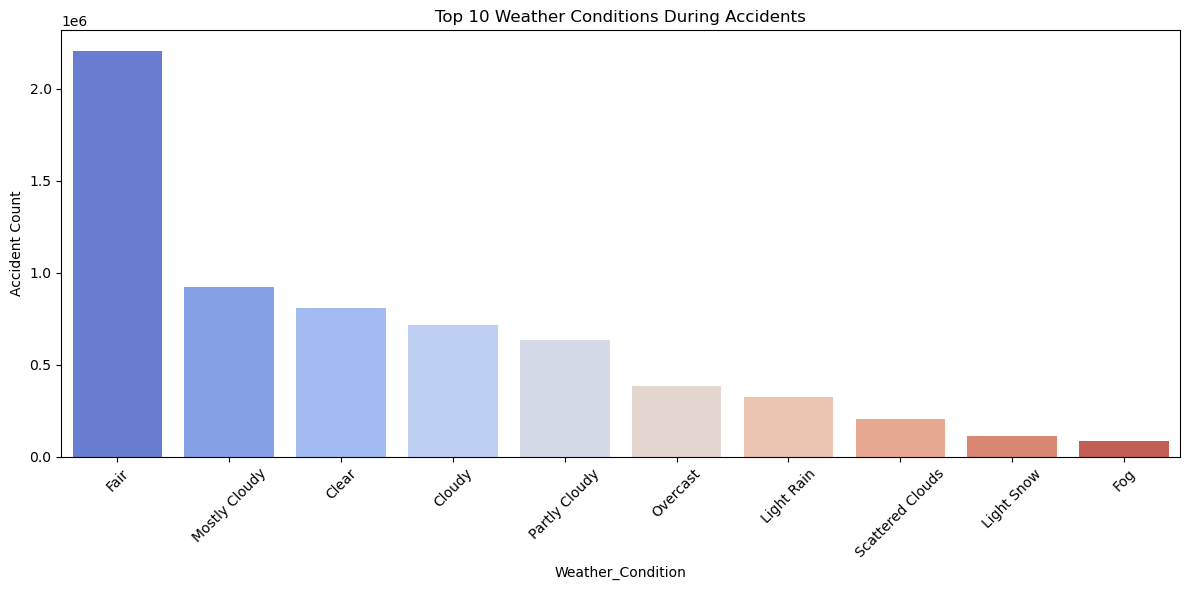

In [59]:
## 2. Accidents by Weather Condition
plt.figure(figsize=(12, 6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10)
sns.barplot(x=top_weather.index, y=top_weather.values, palette='coolwarm')
plt.title('Top 10 Weather Conditions During Accidents')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\2710219453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='Set2')


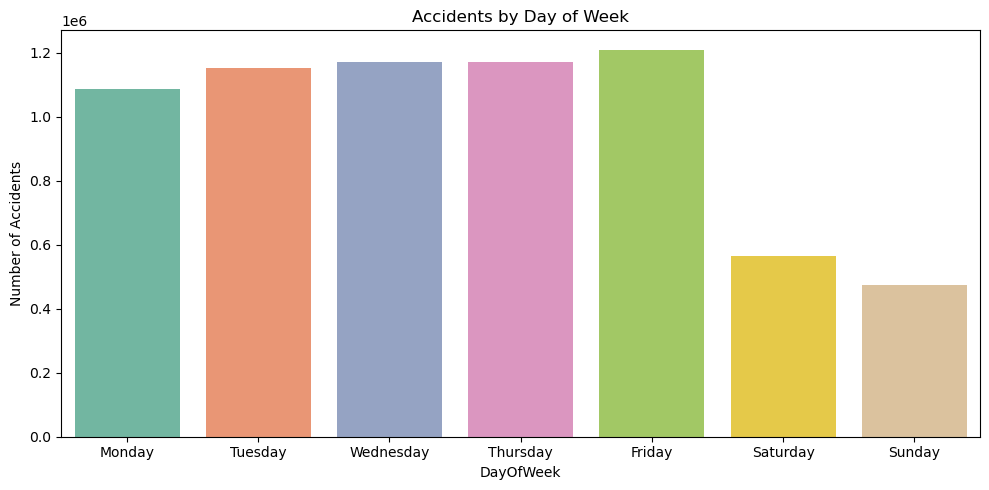

In [60]:
## 3. Accidents by Day of Week
plt.figure(figsize=(10, 5))
sns.countplot(x='DayOfWeek', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='Set2')
plt.title('Accidents by Day of Week')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\1355646909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.index, y=top_weather.values, palette='coolwarm')


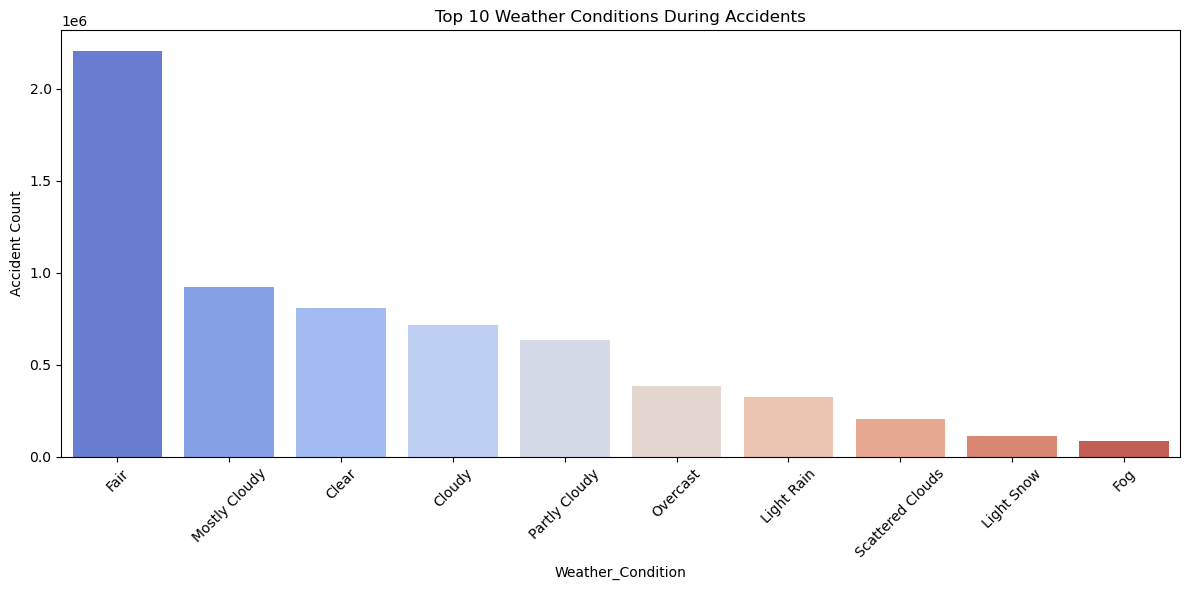

In [80]:
plt.figure(figsize=(12, 6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10)
sns.barplot(x=top_weather.index, y=top_weather.values, palette='coolwarm')
plt.title('Top 10 Weather Conditions During Accidents')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\1313343351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


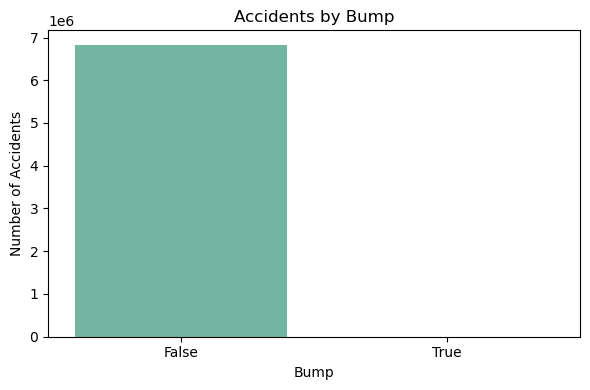

C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\1313343351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


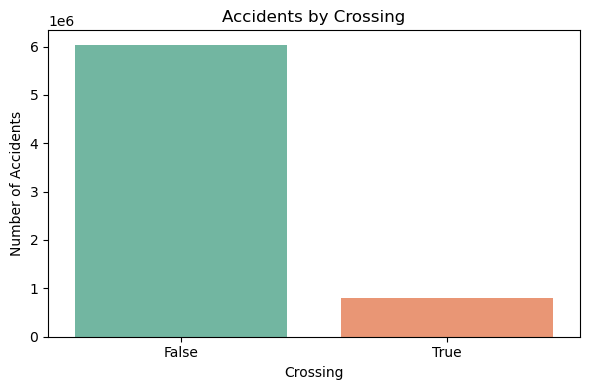

C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\1313343351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


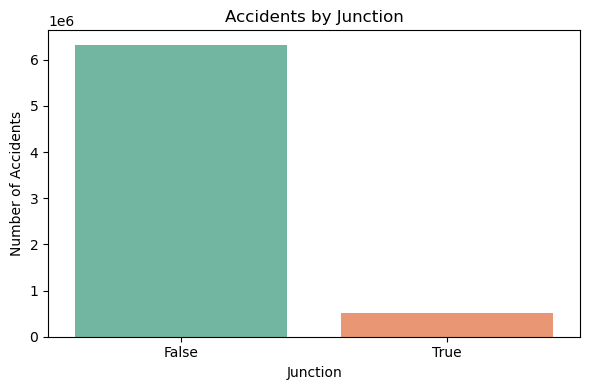

C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\1313343351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


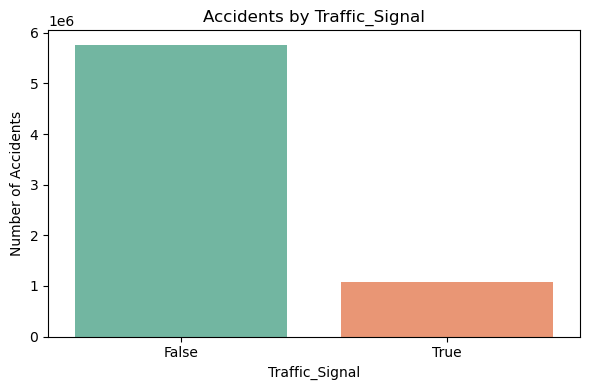

C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\1313343351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


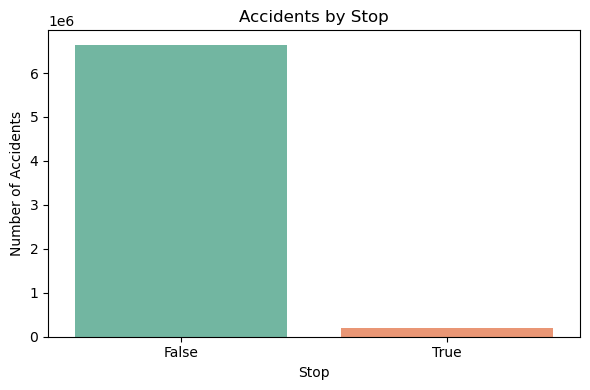

C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\1313343351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


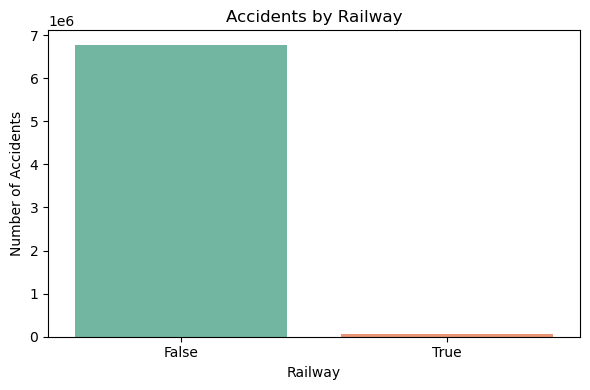

In [82]:
road_features = ['Bump', 'Crossing', 'Junction', 'Traffic_Signal', 'Stop', 'Railway']

for feature in road_features:
    if feature in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=feature, data=df, palette='Set2')
        plt.title(f'Accidents by {feature}')
        plt.ylabel('Number of Accidents')
        plt.tight_layout()
        plt.show()


C:\Users\vatha\AppData\Local\Temp\ipykernel_11456\998788189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='magma')


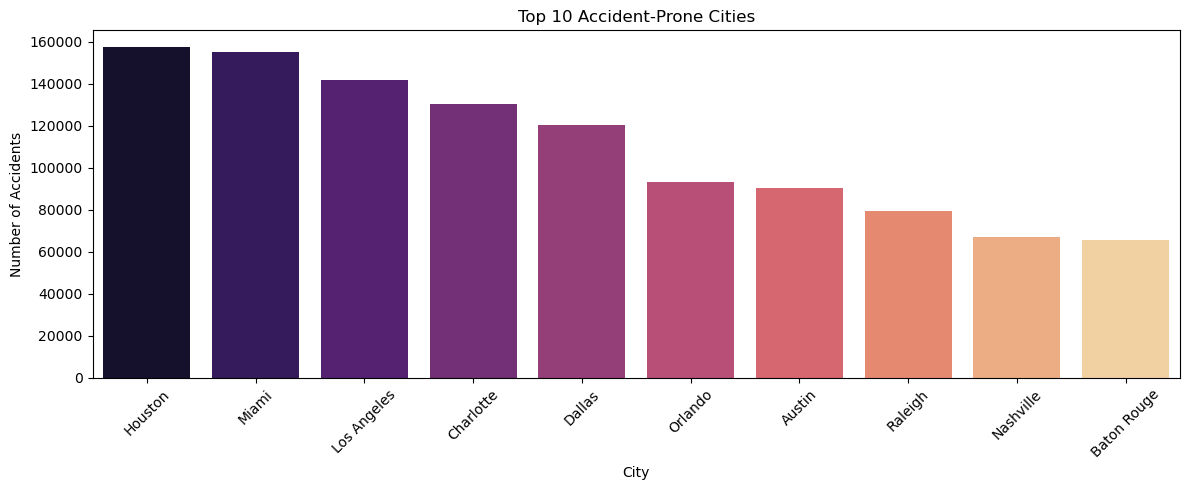

In [90]:
#  Step 8: Hotspot Detection (City-wise)
plt.figure(figsize=(12, 5))
top_cities = df['City'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='magma')
plt.title('Top 10 Accident-Prone Cities')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
# ✅ Step 9: Summary
print("\n✅ Analysis Complete.")


✅ Analysis Complete.
